In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

from pymeeus.JupiterMoons import JupiterMoons
from pymeeus.Epoch import Epoch


%load_ext sql
%sql sqlite:///Event.sqlite

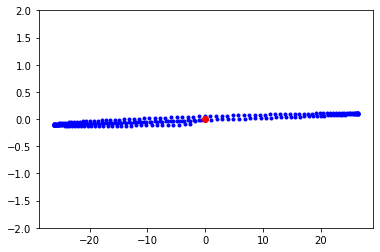

In [44]:
epoch = Epoch()

epoch.set(2459266.458777)

res = JupiterMoons.rectangular_positions_jovian_equatorial(epoch)


plt.figure(1)
for i in range(0, 250):
    epoch += 0.1
    res = JupiterMoons.rectangular_positions_jovian_equatorial(epoch)
    #plt.plot(res[0][0], res[0][1], "b.")
    #plt.plot(res[1][0], res[1][1], "b.")
    #plt.plot(res[2][0], res[2][1], "b.")
    plt.plot(res[3][0], res[3][1], "b.")

plt.ylim([-2,2])
plt.plot(0, 0, "ro")

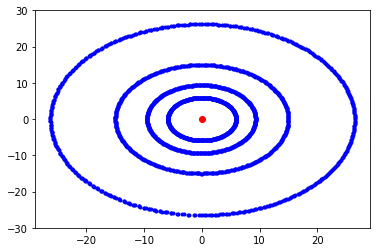

In [45]:
plt.figure(2)
plt.plot(0,0, "ro")

for i in range(0, 500):
    epoch += 0.1
    res = JupiterMoons.rectangular_positions_jovian_equatorial(epoch)
    plt.plot(res[0][0], res[0][2], "b.")
    plt.plot(res[1][0], res[1][2], "b.")
    plt.plot(res[2][0], res[2][2], "b.")
    plt.plot(res[3][0], res[3][2], "b.")
    plt.ylim([-30, 30])

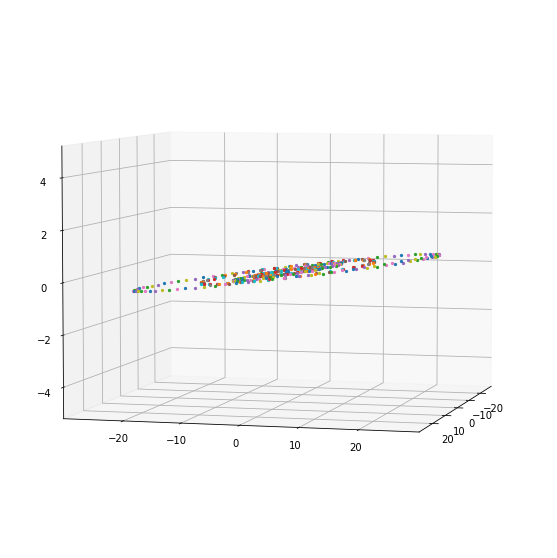

In [69]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter3D(0,0,0)
for i in range(0, 100):
    epoch += 0.2
    res = JupiterMoons.rectangular_positions_jovian_equatorial(epoch)
    ax.scatter3D(res[0][0], res[0][2], res[0][1], marker='.')
    ax.scatter3D(res[1][0], res[1][2], res[1][1], marker='.')
    ax.scatter3D(res[2][0], res[2][2], res[2][1], marker='.')
    ax.scatter3D(res[3][0], res[3][2], res[3][1], marker='.')
ax.set_zlim([-5,5])
ax.view_init(5,15)


In [3]:
cnx = sqlite3.connect(r'Event.sqlite')

In [4]:
sql_cmd = """

WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="PyMeeus"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_pm_th = pd.read_sql_query(sql_cmd, cnx)

In [5]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Uncorrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_un_th = pd.read_sql_query(sql_cmd, cnx)

In [6]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_tc_th = pd.read_sql_query(sql_cmd, cnx)

In [ ]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Elliptical + Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_elltc_th = pd.read_sql_query(sql_cmd, cnx)


In [ ]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Apparent moon radius + Elliptical + Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_apelltc_th = pd.read_sql_query(sql_cmd, cnx)

In [ ]:
plt.figure(1)
df_un_th[df_un_th.Satellite == 1].deltaTime.plot.kde()
df_un_th[df_un_th.Satellite == 2].deltaTime.plot.kde()
df_un_th[df_un_th.Satellite == 3].deltaTime.plot.kde()
df_un_th[df_un_th.Satellite == 4].deltaTime.plot.kde()
df_un_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Denisity not improved\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-1300,1300])
plt.plot()

plt.figure(2)
df_tc_th[df_tc_th.Satellite == 1].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 2].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 3].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 4].deltaTime.plot.kde()
df_tc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Denisity time corrected\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()

plt.figure(3)
df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.plot.kde()
df_elltc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Denisity time corrected + elliptical\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()


plt.figure(4)
df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.plot.kde()
df_apelltc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density all improvements (Aparent radius + elliptical + time correction)\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()

plt.figure(5)
df_apelltc_th[(df_apelltc_th.Satellite == 1) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Satellite == 2) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Satellite == 3) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Satellite == 4) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC")].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density all improvements (Aparent radius + elliptical + time correction)\n (only PA and EC)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()

In [ ]:
plt.figure(6)
df_un_th[df_un_th.Satellite == 1].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 1].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Io)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-200,200])
plt.plot()

plt.figure(7)
df_un_th[df_un_th.Satellite == 2].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 2].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Europa)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-300,300])
plt.plot()

plt.figure(8)
df_un_th[df_un_th.Satellite == 3].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 3].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Ganymede)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-500,500])
plt.plot()

plt.figure(9)
df_un_th[df_un_th.Satellite == 4].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 4].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Callisto)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-700,700])
plt.plot()

plt.figure(10)
df_un_th.deltaTime.plot.kde()
df_tc_th.deltaTime.plot.kde()
df_elltc_th.deltaTime.plot.kde()
df_apelltc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (all)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"], loc="lower left", fontsize="x-small")
plt.xlim([-700,700])
plt.plot()

In [ ]:
plt.figure(11)
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 1].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 1].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 2].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 2].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 3].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 3].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 4].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 4].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th.deltaTime.mean()), (df_tc_th.deltaTime.mean()), (df_elltc_th.deltaTime.mean()), (df_apelltc_th.deltaTime.mean())])
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.ylabel("Mean deviation [s]")
plt.title("Mean deviation")

plt.figure(12)
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 1].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 1].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 2].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 2].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 3].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 3].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 4].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 4].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[df_un_th.deltaTime.std(), df_tc_th.deltaTime.std(), df_elltc_th.deltaTime.std(), df_apelltc_th.deltaTime.std()])
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.ylabel("Standard deviation [s]")
plt.title("Standard deviation")

In [ ]:
print("all phenomena: \n")
print(pd.DataFrame(np.array([[df_un_th.deltaTime.mean(), df_un_th.deltaTime.std()], [df_tc_th.deltaTime.mean(), df_tc_th.deltaTime.std()], [df_elltc_th.deltaTime.mean(), df_elltc_th.deltaTime.std()], [df_apelltc_th.deltaTime.mean(), df_apelltc_th.deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

In [ ]:
print("PA:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "PA")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "PA")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "PA")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "PA")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "PA")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "PA")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "PA")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "PA")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

print()

print("OC:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "OC")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "OC")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "OC")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "OC")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "OC")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "OC")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "OC")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "OC")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

print ()

print("OM:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "OM")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "OM")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "OM")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "OM")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "OM")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "OM")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "OM")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "OM")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

print()

print("EC:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "EC")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "EC")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "EC")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "EC")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "EC")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "EC")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "EC")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "EC")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

In [ ]:
print("No corrections")
print(pd.DataFrame(np.array([[df_un_th[df_un_th.Satellite == 1].deltaTime.mean(), df_un_th[df_un_th.Satellite == 1].deltaTime.std()], [df_un_th[df_un_th.Satellite == 2].deltaTime.mean(), df_un_th[df_un_th.Satellite == 2].deltaTime.std()], [df_un_th[df_un_th.Satellite == 3].deltaTime.mean(), df_un_th[df_un_th.Satellite == 3].deltaTime.std()], [df_un_th[df_un_th.Satellite == 4].deltaTime.mean(), df_un_th[df_un_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\n+Time correction")
print(pd.DataFrame(np.array([[df_tc_th[df_tc_th.Satellite == 1].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 1].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 2].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 2].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 3].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 3].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 4].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\n+Elliptical correction")
print(pd.DataFrame(np.array([[df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\nAll corrections")
print(pd.DataFrame(np.array([[df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))


In [7]:
print("No corrections")
print(pd.DataFrame(np.array([[df_un_th[df_un_th.Satellite == 1].deltaTime.mean(), df_un_th[df_un_th.Satellite == 1].deltaTime.std()], [df_un_th[df_un_th.Satellite == 2].deltaTime.mean(), df_un_th[df_un_th.Satellite == 2].deltaTime.std()], [df_un_th[df_un_th.Satellite == 3].deltaTime.mean(), df_un_th[df_un_th.Satellite == 3].deltaTime.std()], [df_un_th[df_un_th.Satellite == 4].deltaTime.mean(), df_un_th[df_un_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\n+Time correction")
print(pd.DataFrame(np.array([[df_tc_th[df_tc_th.Satellite == 1].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 1].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 2].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 2].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 3].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 3].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 4].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\n+Elliptical correction")
print(pd.DataFrame(np.array([[df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\nAll corrections")
print(pd.DataFrame(np.array([[df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))


In [8]:
sql_cmd = """
WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT,
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="Apparent moon radius + Elliptical + Time corrected (PyMeeus)"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3,
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime,
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df_apelltc_th = pd.read_sql_query(sql_cmd, cnx)

[]

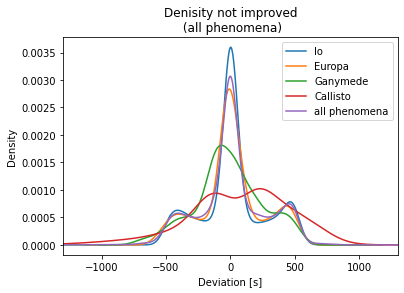

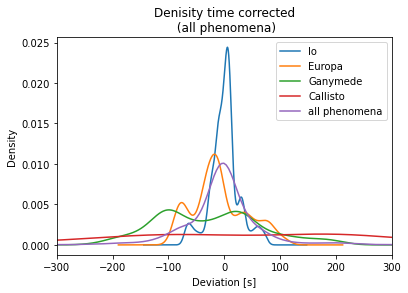

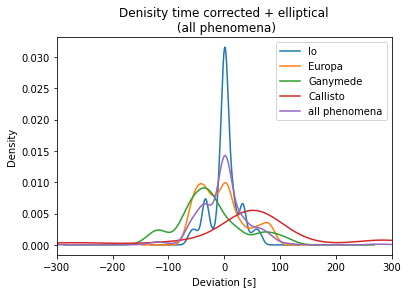

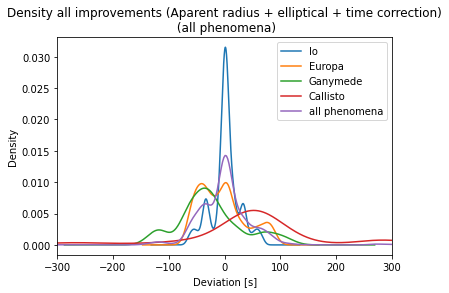

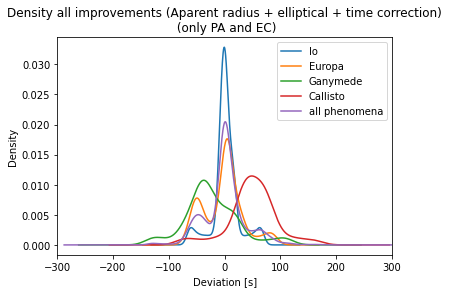

In [9]:
plt.figure(1)
df_un_th[df_un_th.Satellite == 1].deltaTime.plot.kde()
df_un_th[df_un_th.Satellite == 2].deltaTime.plot.kde()
df_un_th[df_un_th.Satellite == 3].deltaTime.plot.kde()
df_un_th[df_un_th.Satellite == 4].deltaTime.plot.kde()
df_un_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Denisity not improved\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-1300,1300])
plt.plot()

plt.figure(2)
df_tc_th[df_tc_th.Satellite == 1].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 2].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 3].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 4].deltaTime.plot.kde()
df_tc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Denisity time corrected\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()

plt.figure(3)
df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.plot.kde()
df_elltc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Denisity time corrected + elliptical\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()


plt.figure(4)
df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.plot.kde()
df_apelltc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density all improvements (Aparent radius + elliptical + time correction)\n (all phenomena)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()

plt.figure(5)
df_apelltc_th[(df_apelltc_th.Satellite == 1) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Satellite == 2) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Satellite == 3) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Satellite == 4) & ((df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC"))].deltaTime.plot.kde()
df_apelltc_th[(df_apelltc_th.Type1 == "PA") | (df_apelltc_th.Type1 == "OC")].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density all improvements (Aparent radius + elliptical + time correction)\n (only PA and EC)")
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.xlim([-300,300])
plt.plot()

[]

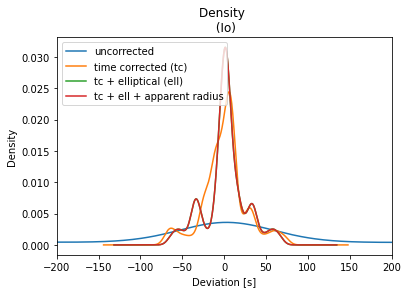

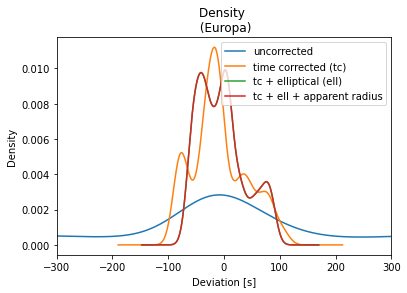

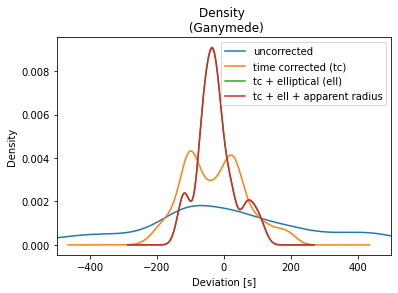

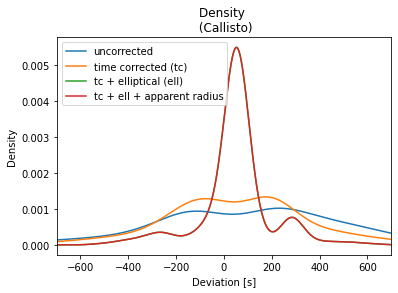

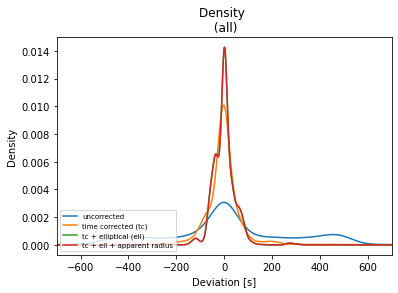

In [10]:
plt.figure(6)
df_un_th[df_un_th.Satellite == 1].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 1].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Io)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-200,200])
plt.plot()

plt.figure(7)
df_un_th[df_un_th.Satellite == 2].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 2].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Europa)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-300,300])
plt.plot()

plt.figure(8)
df_un_th[df_un_th.Satellite == 3].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 3].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Ganymede)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-500,500])
plt.plot()

plt.figure(9)
df_un_th[df_un_th.Satellite == 4].deltaTime.plot.kde()
df_tc_th[df_tc_th.Satellite == 4].deltaTime.plot.kde()
df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.plot.kde()
df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (Callisto)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"])
plt.xlim([-700,700])
plt.plot()

plt.figure(10)
df_un_th.deltaTime.plot.kde()
df_tc_th.deltaTime.plot.kde()
df_elltc_th.deltaTime.plot.kde()
df_apelltc_th.deltaTime.plot.kde()
plt.xlabel("Deviation [s]")
plt.title("Density \n (all)")
plt.legend(["uncorrected", "time corrected (tc)", "tc + elliptical (ell)", "tc + ell + apparent radius"], loc="lower left", fontsize="x-small")
plt.xlim([-700,700])
plt.plot()

Text(0.5, 1.0, 'Standard deviation')

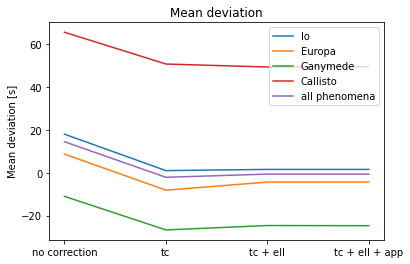

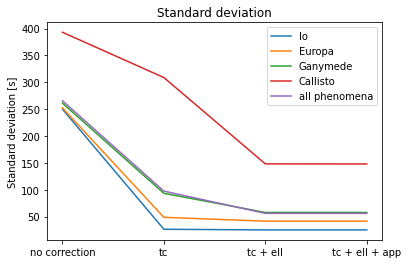

In [11]:
plt.figure(11)
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 1].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 1].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 2].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 2].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 3].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 3].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 4].deltaTime.mean()), (df_tc_th[df_tc_th.Satellite == 4].deltaTime.mean()), (df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.mean()), (df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.mean())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th.deltaTime.mean()), (df_tc_th.deltaTime.mean()), (df_elltc_th.deltaTime.mean()), (df_apelltc_th.deltaTime.mean())])
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.ylabel("Mean deviation [s]")
plt.title("Mean deviation")

plt.figure(12)
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 1].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 1].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 2].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 2].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 3].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 3].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[(df_un_th[df_un_th.Satellite == 4].deltaTime.std()), (df_tc_th[df_tc_th.Satellite == 4].deltaTime.std()), (df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.std()), (df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.std())])
plt.plot(["no correction", "tc", "tc + ell", "tc + ell + app"],[df_un_th.deltaTime.std(), df_tc_th.deltaTime.std(), df_elltc_th.deltaTime.std(), df_apelltc_th.deltaTime.std()])
plt.legend(["Io", "Europa", "Ganymede", "Callisto", "all phenomena"])
plt.ylabel("Standard deviation [s]")
plt.title("Standard deviation")

In [12]:
print("all phenomena: \n")
print(pd.DataFrame(np.array([[df_un_th.deltaTime.mean(), df_un_th.deltaTime.std()], [df_tc_th.deltaTime.mean(), df_tc_th.deltaTime.std()], [df_elltc_th.deltaTime.mean(), df_elltc_th.deltaTime.std()], [df_apelltc_th.deltaTime.mean(), df_apelltc_th.deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

all phenomena: 

                  Mean    Std dev.
uncorrected  14.465824  265.736139
tc           -2.136895   97.477687
tc+ell       -0.656005   56.063942
tc+ell+app   -0.651541   56.088965


In [13]:
print("PA:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "PA")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "PA")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "PA")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "PA")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "PA")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "PA")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "PA")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "PA")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

print()

print("OC:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "OC")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "OC")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "OC")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "OC")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "OC")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "OC")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "OC")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "OC")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

print ()

print("OM:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "OM")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "OM")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "OM")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "OM")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "OM")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "OM")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "OM")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "OM")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

print()

print("EC:")
print(pd.DataFrame(np.array([[df_un_th[(df_un_th.Type1 == "EC")].deltaTime.mean(), df_un_th[(df_un_th.Type1 == "EC")].deltaTime.std()], [df_tc_th[(df_tc_th.Type1 == "EC")].deltaTime.mean(), df_tc_th[(df_tc_th.Type1 == "EC")].deltaTime.std()], [df_elltc_th[(df_elltc_th.Type1 == "EC")].deltaTime.mean(), df_elltc_th[(df_elltc_th.Type1 == "EC")].deltaTime.std()], [df_apelltc_th[(df_apelltc_th.Type1 == "EC")].deltaTime.mean(), df_apelltc_th[(df_apelltc_th.Type1 == "EC")].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("uncorrected", "tc", "tc+ell", "tc+ell+app")))

PA:
                 Mean   Std dev.
uncorrected  6.555483  97.923290
tc           4.390992  97.814294
tc+ell       4.642950  39.108883
tc+ell+app   4.631854  39.076792

OC:
                 Mean   Std dev.
uncorrected -4.552083  94.532807
tc          -2.082176  94.643058
tc+ell      -6.753472  32.188547
tc+ell+app  -6.739583  32.206324

OM:
                  Mean    Std dev.
uncorrected  35.906658  341.345202
tc            3.497389   58.077096
tc+ell        3.731723   88.158587
tc+ell+app    3.707572   88.181346

EC:
                  Mean    Std dev.
uncorrected  11.147490  359.082388
tc          -16.561390  129.478089
tc+ell       -8.058778   29.141078
tc+ell+app   -7.996911   29.374494


In [18]:
print("No corrections")
print(pd.DataFrame(np.array([[df_un_th[df_un_th.Satellite == 1].deltaTime.mean(), df_un_th[df_un_th.Satellite == 1].deltaTime.std()], [df_un_th[df_un_th.Satellite == 2].deltaTime.mean(), df_un_th[df_un_th.Satellite == 2].deltaTime.std()], [df_un_th[df_un_th.Satellite == 3].deltaTime.mean(), df_un_th[df_un_th.Satellite == 3].deltaTime.std()], [df_un_th[df_un_th.Satellite == 4].deltaTime.mean(), df_un_th[df_un_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\n+Time correction")
print(pd.DataFrame(np.array([[df_tc_th[df_tc_th.Satellite == 1].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 1].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 2].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 2].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 3].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 3].deltaTime.std()], [df_tc_th[df_tc_th.Satellite == 4].deltaTime.mean(), df_tc_th[df_tc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\n+Elliptical correction")
print(pd.DataFrame(np.array([[df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 1].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 2].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 3].deltaTime.std()], [df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.mean(), df_elltc_th[df_elltc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))

print("\nAll corrections")
print(pd.DataFrame(np.array([[df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 1].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 2].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 3].deltaTime.std()], [df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.mean(), df_apelltc_th[df_apelltc_th.Satellite == 4].deltaTime.std()]]), columns=["Mean", "Std dev."], index=("Io", "Europa", "Ganymede", "Callisto")))


No corrections
               Mean    Std dev.
Io        18.005212  250.047568
Europa     8.672143  252.428396
Ganymede -11.025547  261.261892
Callisto  65.542553  393.236205

+Time correction
               Mean    Std dev.
Io         0.981013   26.483093
Europa    -8.158327   48.710014
Ganymede -26.690998   93.370632
Callisto  50.712766  308.904166

+Elliptical correction
               Mean    Std dev.
Io         1.543559   25.254934
Europa    -4.353996   41.532797
Ganymede -24.650426   57.753436
Callisto  49.325333  148.169998

All corrections
               Mean    Std dev.
Io         1.541698   25.251383
Europa    -4.349515   41.523207
Ganymede -24.718978   57.747488
Callisto  49.465426  148.050942
